<h1><center>Chapter 1</center></h1>
<h3><center>v1.2</center></h3>

SyntaxError: invalid syntax (<ipython-input-3-95c138bde261>, line 1)

In [2]:
#for compatibility Python 2 / python 3
from __future__ import division, print_function
from builtins import range

%matplotlib inline
#import numpy as np  ---> use autograd.numpy instead for automatiic differentiation
import autograd.numpy as np
from autograd import grad
np.random.seed(123)
import time as time
import matplotlib.pyplot as plt

## Exercise 1
We prove in class that $\mathbb{E}[(U \cdot V)^2=d$ if $U$ and $V$ are two centred 
Gaussian random variables in $\mathbb{R}^d$ with unit covariance. Let us check this result numerically!

In [5]:
#generate some samples
n_samples = 10**6
d = 10

U_samples = np.random.normal(loc=0, scale=1, size=n_samples * d)
U_samples = U_samples.reshape(n_samples, d)
V_samples = np.random.normal(loc=0, scale=1, size=n_samples * d)
V_samples = V_samples.reshape(n_samples, d)

In [6]:
n_samples

1000000

In [4]:
#let us check that U_sample and V_sampel have the right dimension
print("Dimension of U_sample =",U_samples.shape)
print("Dimension of V_sample =",U_samples.shape)

Dimension of U_sample = (1000000, 10)
Dimension of V_sample = (1000000, 10)


In [5]:
#let us now compute the empirical mean
mean_empirical = 0.0
for k in range(n_samples):
    mean_empirical = mean_empirical + np.dot(U_samples[k,:], V_samples[k,:])**2
mean_empirical = mean_empirical / n_samples  
print("empirical_mean=", mean_empirical)

empirical_mean= 10.0006388046


## Exercise 2
Generate $n$ samples from a standard Gaussian random variable in $\mathbb{R}^d$ with mean zero and unit covariance matrix. You can choose $n = 500$ and $d = 300$ for example.
1. Compute the empirical covariance matrix $S$.    empirical covariance should be same as true covariance for large n 
2. All the eigenvalues of $S$ are non-negative: why?    the eigenvalues should be close to 1 
3. Draw an histogram of all the eigenvalues.
4. Do the same with $n=10^6$ and $d=300$

In [6]:
#generate samples
n=500 #n is not large as compared to d 
d=300
gaussian_samples = np.random.normal(loc=0, scale=1, size=n * d)
gaussian_samples = gaussian_samples.reshape(n, d)

#compute empirical covariance
empirical_cov = np.cov(gaussian_samples.T)

#for sanity check, display the dimension
print("dimension of the empirical covariance=", empirical_cov.shape)

dimension of the empirical covariance= (300, 300)


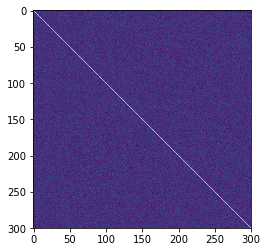

In [7]:
#intuitively, this covariance matrix 
#should be close to the identity matrix. 
#Let us visualize it
plt.imshow(empirical_cov)

In [8]:
#Let us compute the eigenvalues of this empirical covariance matrix
spectrum = np.linalg.eigh(empirical_cov)
eigenvalues = spectrum[0]

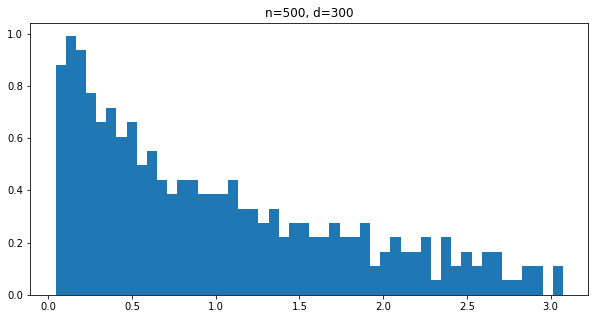

In [9]:
plt.rcParams['figure.figsize'] = (10,5) # Make the figures a bit bigger
histogram = plt.hist(eigenvalues, bins=50, normed=True)
plt.title("n=500, d=300")

Ok, the empirical spectrum (i.e. the set of eigenvalues) is pretty far from the spectrum of the identity matrix. Let us increase the sample size and see if this is better

In [10]:
#generate samples
n=100000
d=300
gaussian_samples = np.random.normal(loc=0, scale=1, size=n * d)
gaussian_samples = gaussian_samples.reshape(n, d)

#compute empirical covariance
empirical_cov = np.cov(gaussian_samples.T)

#for sanity check, display the dimension
print("dimension of the empirical covariance=", empirical_cov.shape)

dimension of the empirical covariance= (300, 300)


In [11]:
#Let us compute the eigenvalues of this empirical covariance matrix
spectrum = np.linalg.eigh(empirical_cov)
eigenvalues = spectrum[0]

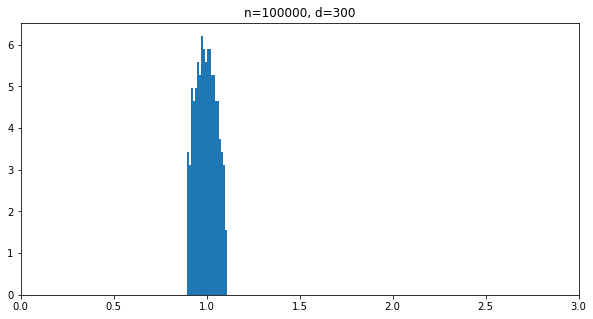

In [12]:
plt.rcParams['figure.figsize'] = (10,5) # Make the figures a bit bigger
histogram = plt.hist(eigenvalues, bins=20, normed=True)
plt.xlim(0,3)
plt.title("n=100000, d=300")

## Exercise 3
Investigate numerically how long it takes for Numpy to invert a $d \times d$ matrix. One possible approach is as follows. In dimension $d$, consider a matrix $R$ whose elements are random numbers generated from whatever distribution.
1. Prove that the matrix $A = I + R\, R^T$ is invertible.
2. For each value of $d = 50, 100, 150, \ldots$, measure how long
it takes for Numpy to invert the matrix $A$. Display your findings on a figure using log-scales.

In [13]:
def create_random_matrix(d):
    R = np.random.normal(loc=0, scale=1, size=d*d).reshape(d,d)
    return np.eye(d) + np.dot(R,R.T)


In [14]:
dim_list = [100,250,500,750,1000, 1500, 2000, 3000]
inversion_time_list = []
nb_repeat = 10  #several timing for each dimension
for d in dim_list:
    print(d)
    time_list = np.zeros(nb_repeat)  #to record times
    for k in range(nb_repeat):
        A = create_random_matrix(d)
        
        start = time.time()
        A_inv = np.linalg.inv(A)
        end = time.time()
        time_to_invert = end - start
        
        time_list[k] = time_to_invert
    inversion_time_list.append( np.median(time_list) )  #only record the median


100
250
500
750
1000
1500
2000
3000


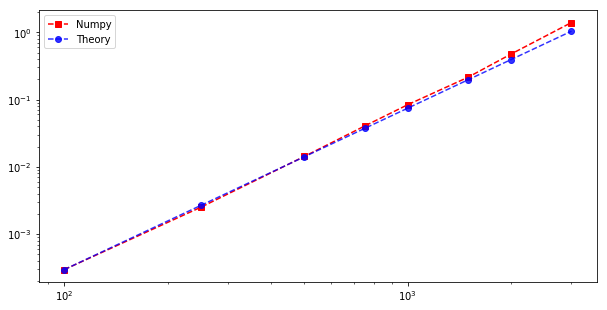

In [15]:
plt.rcParams['figure.figsize'] = (10,5) # Make the figures a bit bigger
plt.plot(dim_list, inversion_time_list, "r--s", label="Numpy")

#theory says that it takes roughly d**2.4 to invert a dxd matrix
# see: https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra
C = inversion_time_list[0] / dim_list[0]**2.4
plt.plot(dim_list, C*np.array(dim_list)**2.4, "b--o", alpha=0.8, label="Theory")

plt.yscale('log')
plt.xscale('log')
plt.legend()


## Exercise 4 (Numerical gradient)
Consider the function $F(x_0,x_1) = \sin(x_0) + x_0 \, x_1$.
1. What is the gradient of $F$ at $(0,0)$?
2. Check numerically that your answer to question 1. is correct

chap 1 page 19

In [8]:
def F(x):
    return np.sin(x[0]) + x[0]*x[1]
    
def grad_F(x):
    return np.array([np.cos(x[0]) + x[1], x[0]])

In [9]:
epsilon = 10**-2
e0 = np.array([1,0])
e1 = np.array([0,1])


#compute approximate gradient
x = np.zeros(2)
approx_grad = np.zeros(2)
approx_grad[0] =  ( F(x+epsilon*e0) - F(x-epsilon*e0) ) / (2*epsilon)
approx_grad[1] =  ( F(x+epsilon*e1) - F(x-epsilon*e1) ) / (2*epsilon)

#compare
print("True gradient:", grad_F(x))
print("Approximate gradient:", approx_grad)





True gradient: [ 1.  0.]
Approximate gradient: [ 0.99998333  0.        ]


## Exercise 5 (Autograd)
Install the python package autograd and use it to automatically compute the gradient of the function
$$F (x) = \log \left( 1 + e^{-\langle x,v \rangle} \right)$$
where $v \in \mathbb{R}^d$ is a given vector. Numerically check your answer.



In [12]:
dim = 2
v = np.random.normal(loc=0, scale=1, size=dim) #random v

#define the function
def F(x):
    return np.log(1+np.exp(-np.dot(x,v)))
#and compute its gradient
grad_F = grad(F)

In [13]:
x = np.random.normal(loc=0, scale=1, size=dim) #random v

#compute numerically the gradient
epsilon = 10**-3
e0 = np.array([1,0])
e1 = np.array([0,1])


#compute approximate gradient
approx_grad = np.zeros(2)
approx_grad[0] =  ( F(x+epsilon*e0) - F(x-epsilon*e0) ) / (2*epsilon)
approx_grad[1] =  ( F(x+epsilon*e1) - F(x-epsilon*e1) ) / (2*epsilon)

#compare
print("True gradient:", grad_F(x))
print("Approximate gradient:", approx_grad)

True gradient: [-0.73800503  0.33172468]
Approximate gradient: [-0.73800503  0.33172468]


In [15]:
def compute_2d_grid(min_x, max_x, min_y, max_y, n_x, n_y, func):
    """
    min_x, max_x, min_y, max_y: min/max values for the grid to compute
    n_x, n_y: number of points between min and max
    func: the function to compute
    """
    x_list, y_list = np.linspace(min_x, max_x, n_y), np.linspace(min_y, max_y, n_y)
    y_grid, x_grid = np.meshgrid(x_list, y_list)
    z_grid = np.zeros((len(x_list), len(y_list)))

    for ix in range(len(x_list)):
        for iy in range(len(y_list)):
            x, y = x_grid[ix, iy], y_grid[ix, iy]
            z_grid[ix, iy] = func([x,y])
    return x_grid, y_grid, z_grid


/Users/Allen/Library/Python/3.4/lib/python/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/Allen/Library/Python/3.4/lib/python/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elem

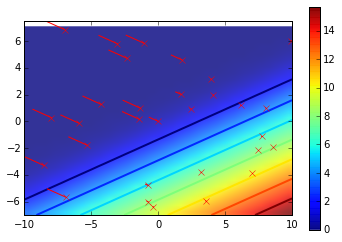

In [16]:
#create a grid of points
min_x, max_x = -10, 10
min_y, max_y = -7, 7
n_x, n_y = 20, 30

x_grid, y_grid, z_grid = compute_2d_grid(min_x, max_x, min_y, max_y, n_x, n_y, F)

#plot the function
plt.imshow(z_grid, extent=[min_x, max_x, min_y, max_y], 
           origin='lower', interpolation="bilinear", alpha=0.8)

#plot a few gradient
n_gradient_to_plot = 30
for _ in range(n_gradient_to_plot):
    #random points
    x, y = min_x + (max_x-min_x)*np.random.rand(), min_y + (max_y-min_y)*np.random.rand()
    grad_x, grad_y = grad_F(np.array([x,y]))
    #plot points and its gradient
    plt.plot([x],[y], "rx")
    plt.plot([x, x+grad_x],[y,y+grad_y], "r-")

plt.colorbar()
plt.contour(z_grid, linewidths=2, extent=[min_x, max_x, min_y, max_y])
plt.show()

## Exercise 5 (Autograd)
Consider the function $G(x,y) = x^2+y^2$. Plot this function and a few gradient

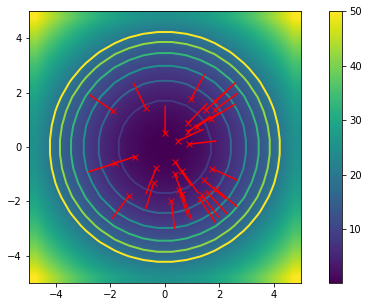

In [131]:
def G(x):
    return x[0]**2+x[1]**2
grad_G = grad(G)

#create a grid of points
min_x, max_x = -5, 5
min_y, max_y = -5, 5
n_x, n_y = 20, 20

x_grid, y_grid, z_grid = compute_2d_grid(min_x, max_x, min_y, max_y, n_x, n_y, G)

#plot the function
plt.imshow(z_grid, extent=[min_x, max_x, min_y, max_y], 
           origin='lower', interpolation="bilinear")

#plot a few gradient
n_gradient_to_plot = 30
for _ in range(n_gradient_to_plot):
    #random points
    x, y = -2 + 4*np.random.rand(), -2 + 4*np.random.rand()
    grad_x, grad_y = grad_G(np.array([x,y]))
    #normalize the gradient for better plotting
    grad_norm = np.linalg.norm(np.array([grad_x, grad_y]))
    grad_x, grad_y = grad_x / grad_norm, grad_y/ grad_norm
    #plot points and its gradient
    plt.plot([x],[y], "rx")
    plt.plot([x, x+grad_x],[y,y+grad_y], "r-")
    
plt.colorbar()
plt.contour(z_grid, np.arange(0, 20, 3), linewidths=2, extent=[min_x, max_x, min_y, max_y])
plt.show()